# Kegiatan Praktikum Modul 5

## Tugas 1 - Klasifikasi Citra

1. Import library yang diperlukan
2. Load dan unzip data rps.zip dari link dataset yang diberikan
2. Lakukan splitting folder yang mencakup folder train, val, dan test
3. Melakukan Exploration Data Analyst
4. Lakukan Pre-processing dan Data Augmentation yang menurut kamu memberikan dataset yang lebih efisien
5. Implementasikan model transfer learning dengan pre-trained architectures models yang anda inginkan menggunakan Tensorflow Keras, PyTorch ataupun lainnya
6. Lakukan Fit Model dengan epoch yang anda tentukan
7. Evaluate Model dengan menampilkan Plot, Loss, Accuracy serta Classification Report
8. Pilih 10 gambar secara acak pada data test hasil splitting kemudian lakukan predict. Tunjukkan hasilnya kepada asisten.

In [ ]:
#import needed library
import os
from tensorflow.keras.utils import image_dataset_from_directory, array_to_img, img_to_array
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.models impor
t Sequential, Model, load_model
from tensorflow.keras import layers
from tensorflow.data import AUTOTUNE
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
## Disable warning message
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

## Load Data and Splitting Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
DATASET_DIR = "/content/drive/MyDrive/rps"
IMAGE_SIZE = (224,244)
BATCH_SIZE = 128

In [ ]:
from keras.preprocessing import image

In [ ]:
train_ds = image_dataset_from_directory(
  DATASET_DIR,
  validation_split=0.2,
  subset="training",
  label_mode='categorical',
  seed=123,
  image_size=IMAGE_SIZE,
  batch_size=BATCH_SIZE)

val_ds = image_dataset_from_directory(
  DATASET_DIR,
  validation_split=0.2,
  subset="validation",
  label_mode='categorical',
  seed=123,
  image_size=IMAGE_SIZE,
  batch_size=BATCH_SIZE)

Found 2530 files belonging to 3 classes.
Using 2024 files for training.
Found 2530 files belonging to 3 classes.
Using 506 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['paper', 'rock', 'scissors']


## EDA

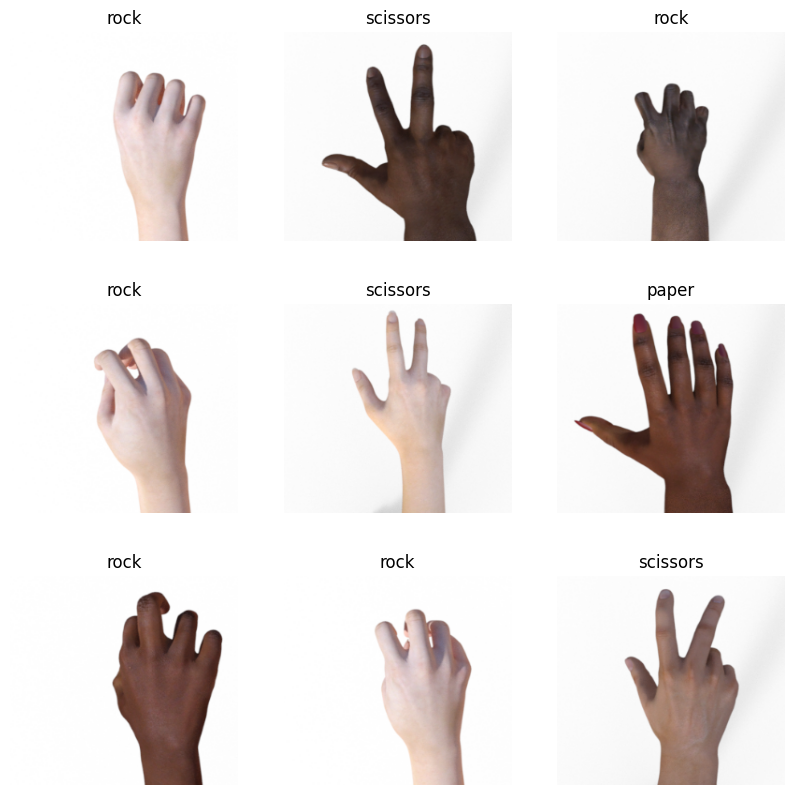

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(128, 224, 244, 3)
(128, 3)


## Preprocessing

In [ ]:
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Image Augmentation

In [ ]:
img_augmentation = Sequential(
    [
        layers.RandomRotation(factor=0.15),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomFlip(),
        layers.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

## Build Model

In [ ]:
def build_model():
    inputs = layers.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
    x = img_augmentation(inputs)
    model = EfficientNetB3(include_top=False, input_tensor=x, weights="imagenet")
-
    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)
    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(3, activation="softmax", name="pred")(x)

    # Compile
    model = Model(inputs, outputs, name="EfficientNet")
    optimizer = Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model

In [ ]:
model = build_model()

43941136/43941136 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 244, 3)]        0         []                            
                                                                                                  
 img_augmentation (Sequenti  (None, 224, 244, 3)          0         ['input_1[0][0]']             
 al)                                                                                              
                                                                                                  
 rescaling (Rescaling)       (None, 224, 244, 3)          0         ['img_augmentation[0][0]']    
                                                                                                  
 normalization (Normalizati  (None, 224, 244, 3)          7         ['rescaling[0][0]']

## Train Model

In [ ]:
epochs = 10
hist = model.fit(train_ds, epochs=epochs, validation_data=train_ds)

Epoch 1/10
16/16 [==============================] - 843s 52s/step - loss: 0.3341 - accuracy: 0.8898 - val_loss: 0.4301 - val_accuracy: 0.8607
Epoch 2/10
16/16 [==============================] - 805s 52s/step - loss: 0.1288 - accuracy: 0.9718 - val_loss: 0.4219 - val_accuracy: 0.8528
Epoch 3/10
16/16 [==============================] - 867s 56s/step - loss: 0.0823 - accuracy: 0.9738 - val_loss: 0.1844 - val_accuracy: 0.9466
Epoch 4/10
16/16 [==============================] - 857s 55s/step - loss: 0.0477 - accuracy: 0.9837 - val_loss: 0.1906 - val_accuracy: 0.9323
Epoch 5/10
16/16 [==============================] - 876s 57s/step - loss: 0.0520 - accuracy: 0.9817 - val_loss: 0.1324 - val_accuracy: 0.9694
Epoch 6/10
16/16 [==============================] - 868s 56s/step - loss: 0.0528 - accuracy: 0.9842 - val_loss: 0.0523 - val_accuracy: 0.9921
Epoch 7/10
16/16 [==============================] - 866s 56s/step - loss: 0.0723 - accuracy: 0.9802 - val_loss: 0.1313 - val_accuracy: 0.9644
Epoch 

In [ ]:
import os
if os.path.exists('./model')==False:
    os.mkdir('./model')

In [ ]:
model.save("./model/model_image.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = load_model("./model/model_image.h5")

## Evaluation

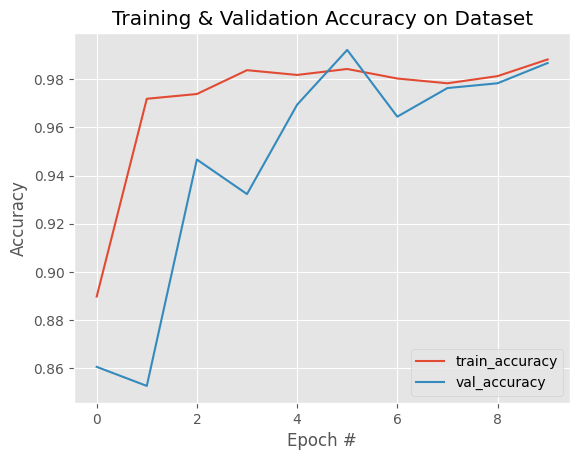

In [ ]:
N = np.arange(0, epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, hist.history["accuracy"], label="train_accuracy")
plt.plot(N, hist.history["val_accuracy"], label="val_accuracy")
plt.title("Training & Validation Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="best")

In [ ]:
loss, accuracy = model.evaluate(val_ds)
print("Validation: \nAccuracy = %f  \nLoss = %f " % (accuracy, loss))

4/4 [==============================] - 195s 24s/step - loss: 0.0505 - accuracy: 0.9842
Validation: 
Accuracy = 0.984190  
Loss = 0.050467 


In [ ]:
images = []
#predict validation dataset
dt = val_ds.take(1)
preds = model.predict(val_ds)

i = 0
for data in dt:
    for d in data[0]:
        images.append(array_to_img(d))
        i+=1
        if i == 10:
            break

4/4 [==============================] - 98s 24s/step


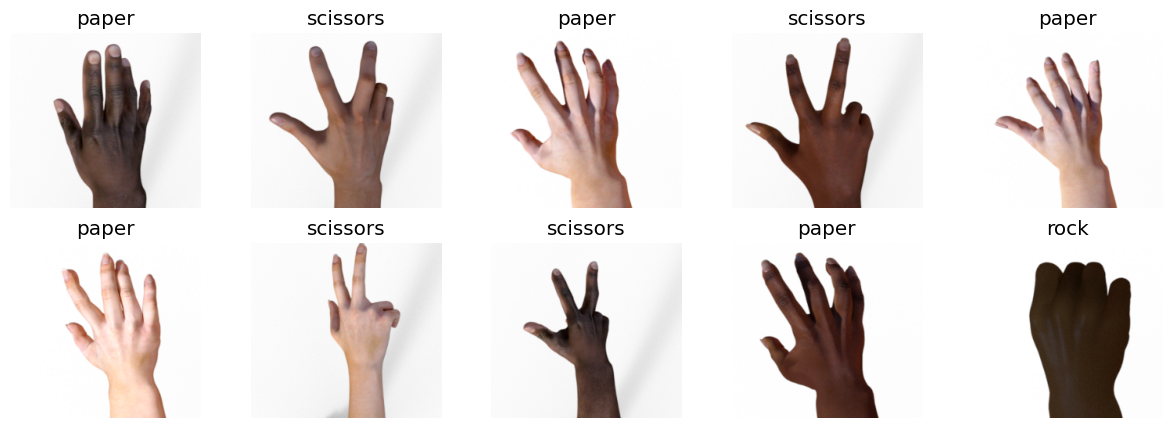

In [ ]:
#Predicted result
plt.figure(figsize=(15, 5))
plt.tight_layout()

for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(preds[i])])
    plt.axis("off")

In [ ]:
y_pred = model.predict(val_ds)
y_preds = np.argmax(y_pred, axis=1)
y_true =  np.array([])
for x, y in val_ds:
  y_true = np.concatenate([y_true, np.argmax(y.numpy(), axis=-1)])
print(classification_report(y_true, y_preds, target_names=class_names))

4/4 [==============================] - 97s 24s/step
              precision    recall  f1-score   support

       paper       0.97      0.99      0.98       172
        rock       0.99      1.00      0.99       175
    scissors       0.99      0.96      0.97       159

    accuracy                           0.98       506
   macro avg       0.98      0.98      0.98       506
weighted avg       0.98      0.98      0.98       506

